In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 5]

In [69]:
df = pd.read_csv('D:\\Datasets\\unhcr_popstats_export_time_series_all_data.csv', skiprows=3, encoding = 'latin_1')

C:\Users\debor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
for i in df['Year'].unique():
    if 'Various/Unknown' in set(df.loc[df['Year']==i]['Origin'].unique()):
        print('Year {} has at least one destination country with Origin country unknown'.format(i))
    else:
        print('Year {} has known origins'.format(i))

Year 1951 has at least one destination country with Origin country unknown
Year 1952 has at least one destination country with Origin country unknown
Year 1953 has at least one destination country with Origin country unknown
Year 1954 has at least one destination country with Origin country unknown
Year 1955 has at least one destination country with Origin country unknown
Year 1956 has at least one destination country with Origin country unknown
Year 1957 has at least one destination country with Origin country unknown
Year 1958 has at least one destination country with Origin country unknown
Year 1959 has at least one destination country with Origin country unknown
Year 1960 has at least one destination country with Origin country unknown
Year 1961 has at least one destination country with Origin country unknown
Year 1962 has at least one destination country with Origin country unknown
Year 1963 has at least one destination country with Origin country unknown
Year 1964 has at least on

### Visualization of number of refugees taken in by countries over time <br>

- We consider '*' as zero. Might need a better normalization scheme.

In [73]:
colnames = df.columns
df = df.rename(index = str, columns = {colnames[1]:'Destination'})
#df['Value'] = df['Value'].map({'*': 0})
df['Value'] = df['Value'].replace('*', 0)

In [75]:
df['Value'] = df['Value'].astype('int32')

In [76]:
df['Population type'].unique()

array(['Refugees (incl. refugee-like situations)', 'Returned refugees',
       'Internally displaced persons', 'Returned IDPs',
       'Others of concern', 'Asylum-seekers', 'Stateless persons'],
      dtype=object)

In [180]:
df_refugees = df.loc[df['Population type'] == 'Refugees (incl. refugee-like situations)']
df_refugees = df_refugees.drop(labels = df_refugees.loc[df_refugees['Destination'] == 'Various/Unknown'].index, axis = 0)
groups = df_refugees.groupby(by = ['Year', 'Destination']).sum()

In [181]:
df_refugee_ts = pd.DataFrame(np.zeros(shape=(len(df_refugees['Destination'].unique()),len(df_refugees['Year'].unique()))),
                            columns = np.sort(df_refugees['Year'].unique()),
                            index = df_refugees['Destination'].unique())

for i in groups.index:
    df_refugee_ts.loc[i[1]][i[0]] = groups.loc[i[0]].loc[i[1]]

In [177]:
df_refugee_ts

,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Australia,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20919.0,22548.0,21805.0,23434.0,30083.0,34503.0,35582.0,36917.0,42188.0,48427.0
Austria,282000.0,238200.0,215200.0,150000.0,110000.0,140000.0,68000.0,53000.0,44000.0,39000.0,...,37557.0,38906.0,42630.0,47073.0,51730.0,55598.0,60747.0,72216.0,93250.0,115213.0
Belgium,55000.0,53500.0,53000.0,53000.0,53000.0,65000.0,69000.0,63000.0,58000.0,55000.0,...,17026.0,15545.0,17892.0,22402.0,22024.0,25629.0,29179.0,35314.0,42168.0,42132.0
Canada,168511.0,154828.0,107004.0,75828.0,52551.0,17485.0,46334.0,46908.0,47934.0,48629.0,...,173651.0,169434.0,165549.0,164883.0,163756.0,160349.0,149163.0,135888.0,97332.0,104756.0
"China, Hong Kong SAR",30000.0,0.0,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.0,86.0,154.0,152.0,117.0,126.0,170.0,133.0,110.0,80.0
Denmark,2000.0,1800.0,1600.0,1400.0,1300.0,2500.0,2500.0,2500.0,2400.0,2300.0,...,23401.0,20355.0,17922.0,13399.0,11814.0,13170.0,17785.0,27326.0,33507.0,35629.0
France,290000.0,280000.0,270000.0,263000.0,345415.0,363290.0,389480.0,381152.0,387201.0,245935.0,...,171206.0,196364.0,200687.0,210207.0,217865.0,232487.0,252264.0,273126.0,304546.0,337147.0
Germany,265000.0,240000.0,228000.0,225000.0,219000.0,221000.0,217000.0,212000.0,205000.0,197000.0,...,582735.0,593799.0,594269.0,571684.0,589737.0,187567.0,216973.0,316115.0,669482.0,970318.0
Greece,18000.0,19000.0,18500.0,19000.0,17400.0,16000.0,16000.0,15700.0,15500.0,15500.0,...,2164.0,1695.0,1444.0,1573.0,2100.0,3485.0,10304.0,24838.0,46427.0,38964.0
Italy,26500.0,25500.0,24500.0,21500.0,18500.0,21500.0,21000.0,21000.0,18500.0,15500.0,...,47061.0,54965.0,56397.0,58060.0,64779.0,76264.0,93715.0,118047.0,147370.0,167288.0


In [154]:
def plot_single(data, country):
    data.loc[country].replace(0,np.nan).plot()
    plt.show()
    
    
def plot(data, countries):
    for i in countries:
        data.loc[i].replace(0,np.nan).plot(marker ='o')
    plt.legend(labels = countries)
    plt.show()

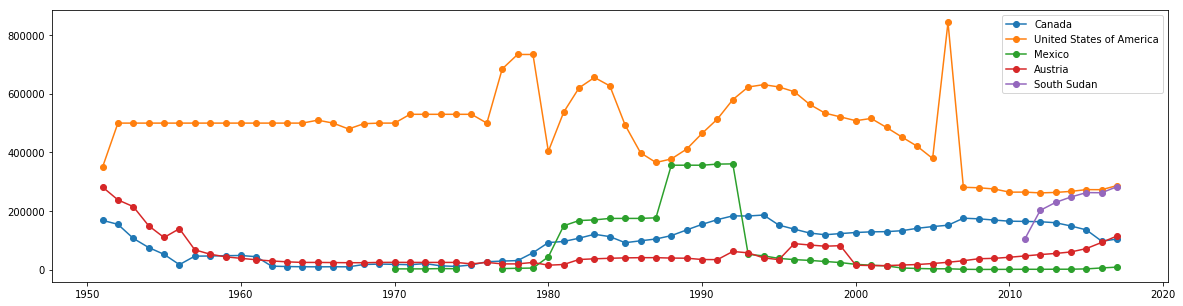

In [189]:
plot(df_refugee_ts, ['Canada', 'United States of America', 'Mexico', 'Austria', 'South Sudan'])

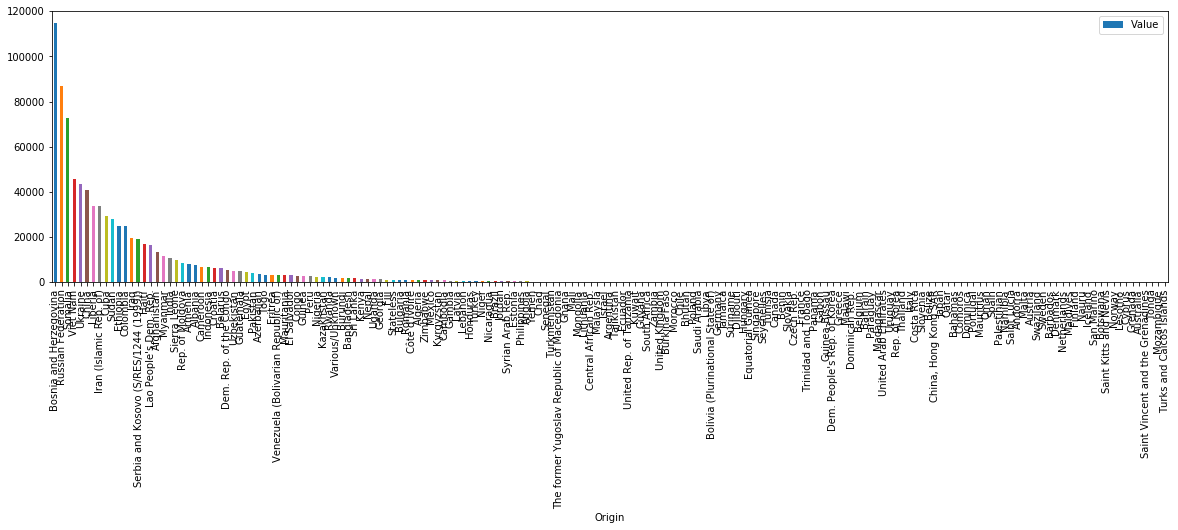

In [198]:
df.loc[df['Year'] == 2006].loc[df.Destination == 'United States of America'].loc[df['Population type'] == 'Refugees (incl. refugee-like situations)'].sort_values('Value',ascending = False).plot.bar(x = 'Origin', y = 'Value')

In [184]:
groups.loc[2017].loc['South Sudan']

Value    283400
Name: South Sudan, dtype: int32